In [1]:
import logging
import time

import aps_8id_bs_instrument
from aps_8id_bs_instrument.data_collection import *  # noqa
from aps_8id_bs_instrument.initialize_bs_tools import (  # noqa: F401
    RE,
    bec,
    cat,
    oregistry,
    peaks,
    sd,
)
from aps_8id_bs_instrument.utils.session_logs import logger
from bluesky.magics import BlueskyMagics
from IPython import get_ipython



from ophyd import EpicsSignal
import bluesky.plans as bp
import bluesky.plan_stubs as bps
import databroker
cat = databroker.catalog["8idi_xpcs"] 

/home/beams10/8IDIUSER/er_bs_v3/src/instrument/utils/config_utils.py


APS device not found, suspenders not installed.
Ignoring component with duplicate name: 'det'
/home/beams/8IDIUSER/.conda/envs/8_id_bs_v0/lib/python3.10/site-packages/ophydregistry/registry.py:552: UserWarning: Ignoring component with duplicate name: 'det'
  warnings.warn(msg)
Ignoring component with duplicate name: 'det_val'
/home/beams/8IDIUSER/.conda/envs/8_id_bs_v0/lib/python3.10/site-packages/ophydregistry/registry.py:552: UserWarning: Ignoring component with duplicate name: 'det_val'
  warnings.warn(msg)
Ignoring component with duplicate name: 'det_Imax'
/home/beams/8IDIUSER/.conda/envs/8_id_bs_v0/lib/python3.10/site-packages/ophydregistry/registry.py:552: UserWarning: Ignoring component with duplicate name: 'det_Imax'
  warnings.warn(msg)
Ignoring component with duplicate name: 'det_center'
/home/beams/8IDIUSER/.conda/envs/8_id_bs_v0/lib/python3.10/site-packages/ophydregistry/registry.py:552: UserWarning: Ignoring component with duplicate name: 'det_center'
  warnings.warn(msg)


creating class
creating class
creating class
creating class


I Thu-16:22:37 - ############################################################ startup
I Thu-16:22:37 - logging started
I Thu-16:22:37 - logging level = 10
I Thu-16:22:37 - /home/beams10/8IDIUSER/er_bs_v3/src/instrument/utils/session_logs.py
I Thu-16:22:38 - /home/beams10/8IDIUSER/er_bs_v3/src/instrument/data_collection.py
I Thu-16:22:38 - writing to SPEC file: /home/beams10/8IDIUSER/er_bs_v3/scripts/20240627-162220.dat
I Thu-16:22:38 -    >>>>   Using default SPEC file name   <<<<
I Thu-16:22:38 -    file will be created when bluesky ends its next scan
I Thu-16:22:38 -    to change SPEC file, use command:   newSpecFile('title')
I Thu-16:22:38 - #### data collection tools are loaded is complete. ####


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/beams10/8IDIUSER/er_bs_v3/scripts/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


In [20]:
# flag2Stats1=EpicsSignal('8idaSoft:flag2:Stats1:Total_RBV',name='flag2Stats1')

# det = [flag2ad, flag2Stats1]
det = [flag2ad]
flag2ad.hdf1.kind="omitted"
flag2ad.stats1.kind="hinted"
flag2ad.stats1.total.kind="hinted"
flag2ad.stats1.max_xy.kind="hinted"
flag2ad.stats1.max_xy.y.kind="hinted"
bec.disable_plots()



Transient Scan ID: 28855     Time: 2024-06-27 16:30:55
Persistent Unique Scan ID: '89140f7a-7277-4727-b7eb-18870651a0db'
New stream: 'label_start_motor'
New stream: 'primary'
+-----------+------------+------------+-------------------------+----------------------+
|   seq_num |       time |   sample_y | flag2ad_stats1_max_xy_y | flag2ad_stats1_total |
+-----------+------------+------------+-------------------------+----------------------+
|         1 | 16:31:05.0 | 36.5000357 |                    1603 |                 3273 |
|         2 | 16:31:06.2 | 36.6000165 |                    1603 |                 3244 |
|         3 | 16:31:07.3 | 36.7000122 |                     545 |                 3294 |
|         4 | 16:31:08.4 | 36.8000119 |                    1603 |                 3243 |
|         5 | 16:31:09.5 | 36.9000079 |                    1603 |                 3243 |
|         6 | 16:31:10.6 | 37.0000235 |                    1064 |                 3255 |
|         7 | 16:31:11

('89140f7a-7277-4727-b7eb-18870651a0db',)

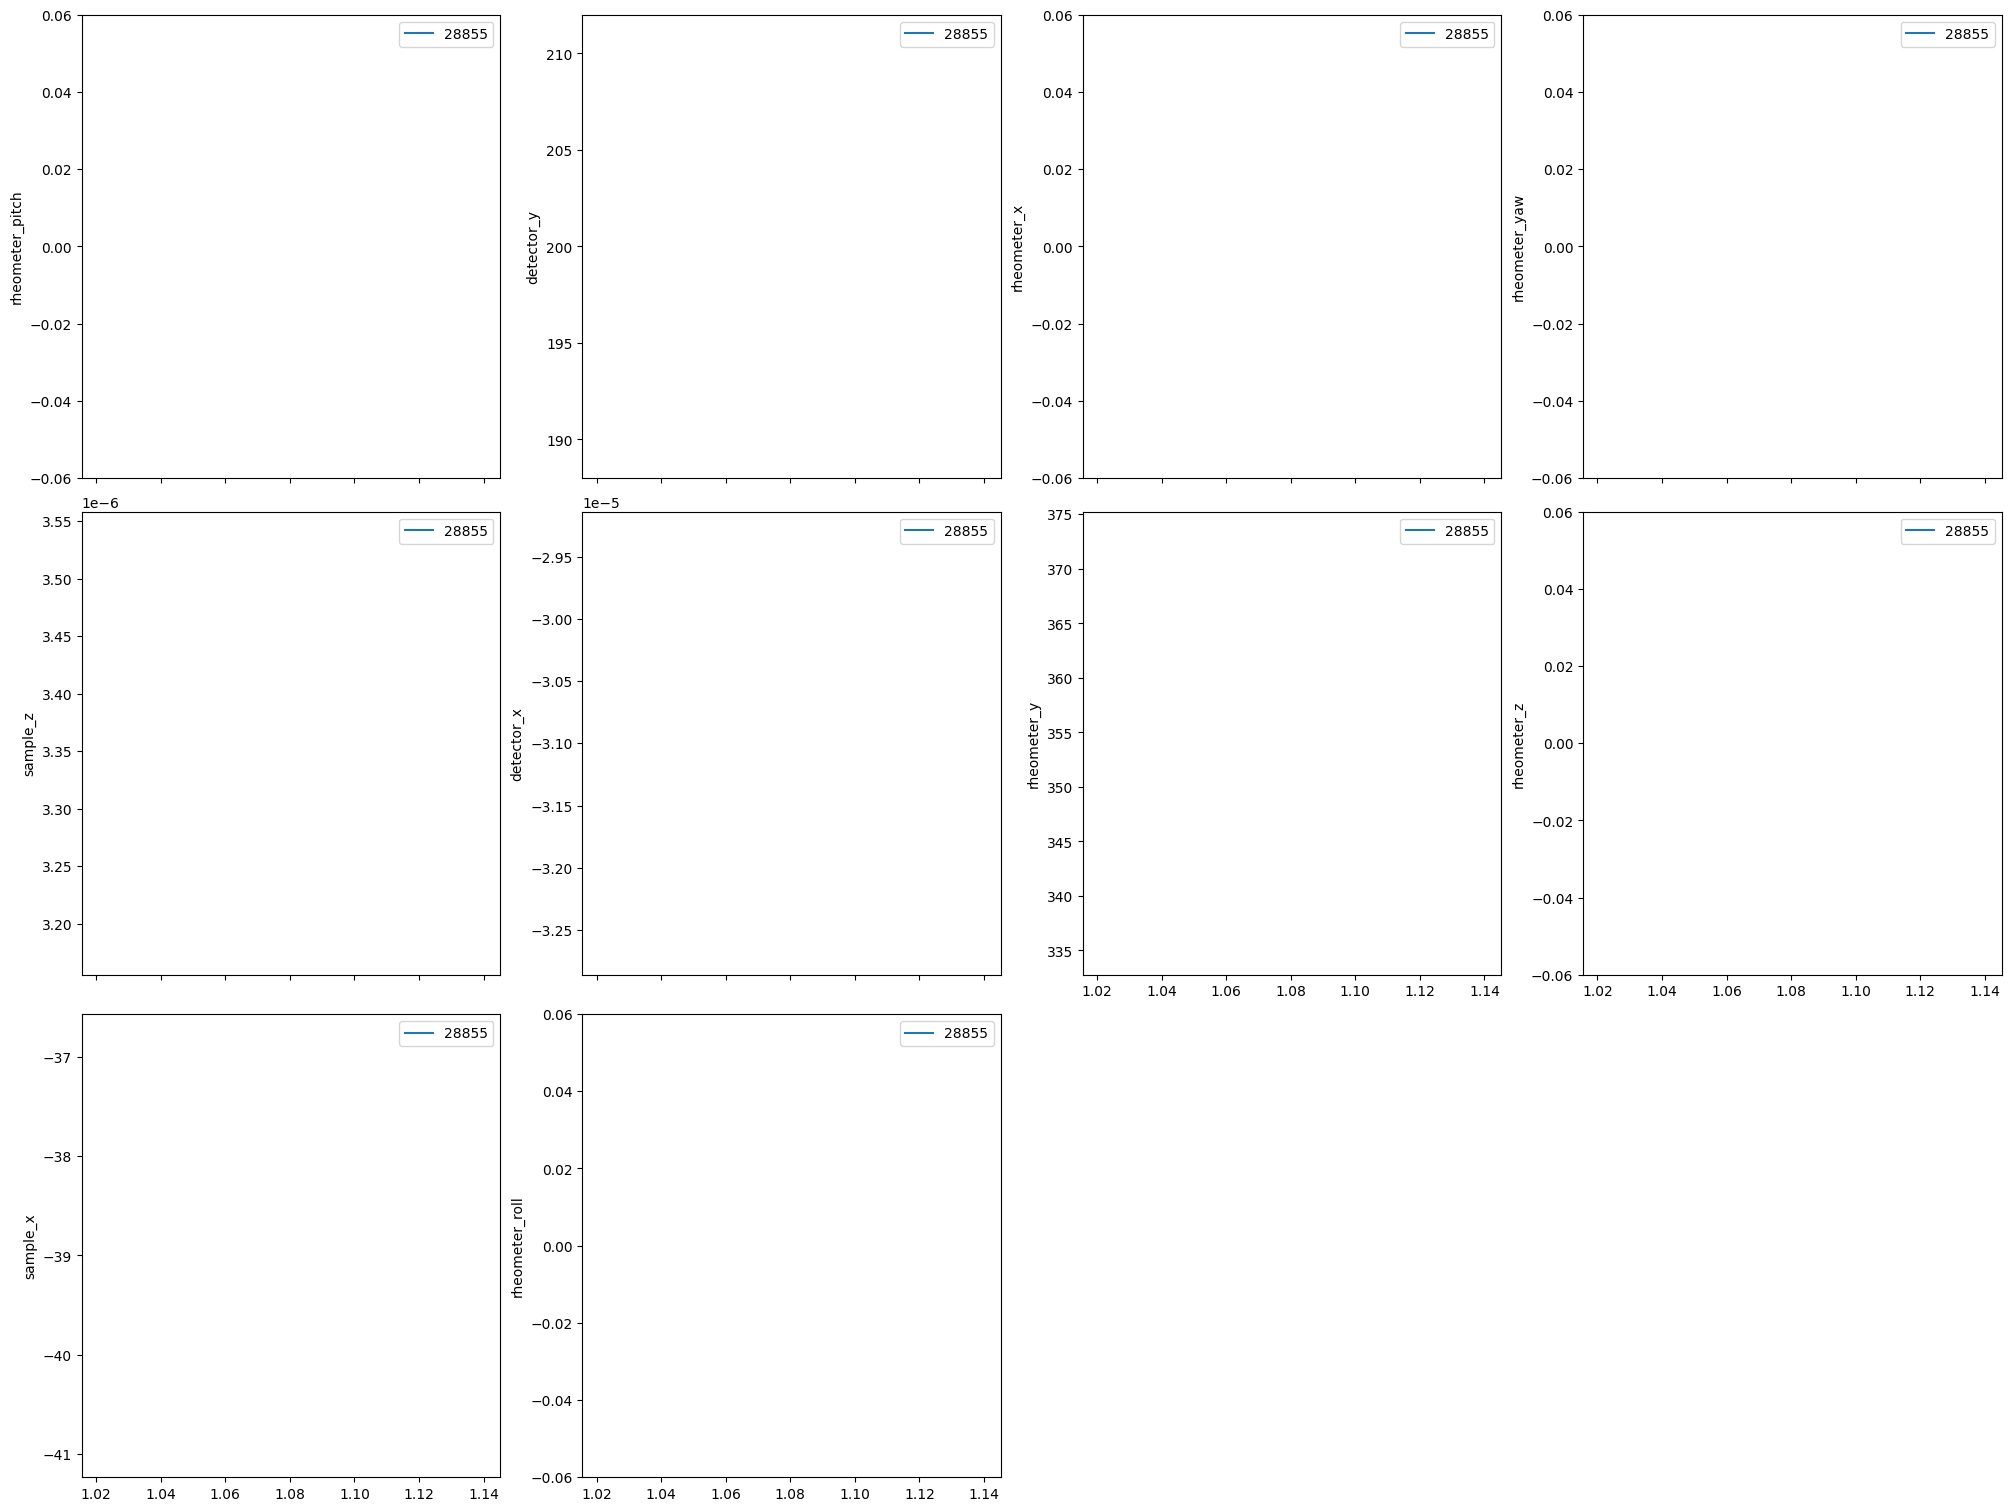

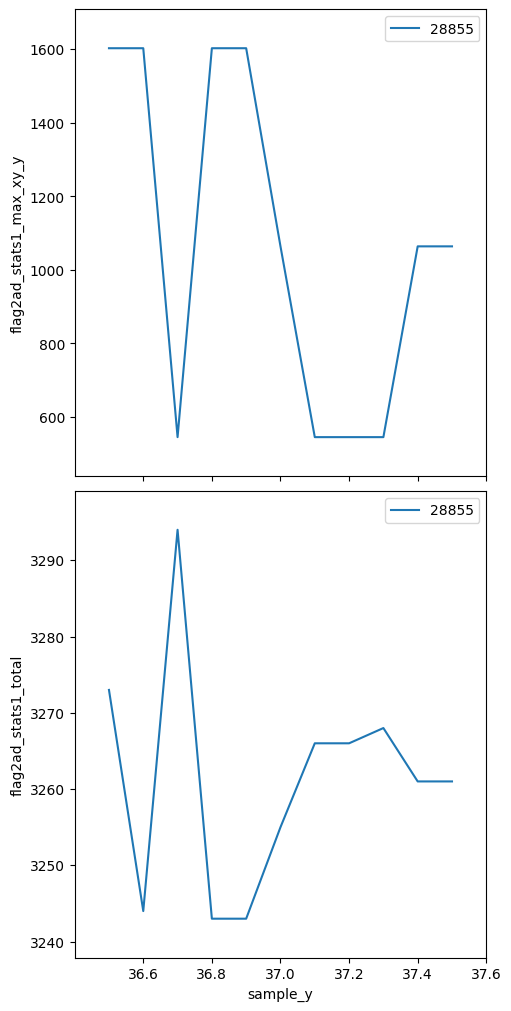

In [22]:
RE(bp.rel_scan(det, sample.y, -0.5,0.5,11))

In [4]:
ds = cat[-1].primary
# ds.metadata

In [5]:
from apstools.utils import plotxy
import hdf5plugin

{28855: {'mean_x': np.float64(37.00001661820845),
  'mean_y': np.float64(3261.2727272727275),
  'stddev_x': 0.33165875255291966,
  'stddev_y': 15.17953167318523,
  'slope': np.float64(-0.09063129892385365),
  'intercept': np.float64(3264.6260868390395),
  'correlation': np.float64(-0.0019802102061150318),
  'centroid': np.float64(37.00001383925465),
  'sigma': 0.31635331830240315,
  'min_x': np.float64(36.500035705566404),
  'max_x': np.float64(37.50000579833984),
  'min_y': np.float64(3243.0),
  'max_y': np.float64(3294.0),
  'x_at_max_y': np.float64(36.70001220703125),
  'x_at_min_y': np.float64(36.90000793457031),
  'fwhm': 0.7449551352505552}}

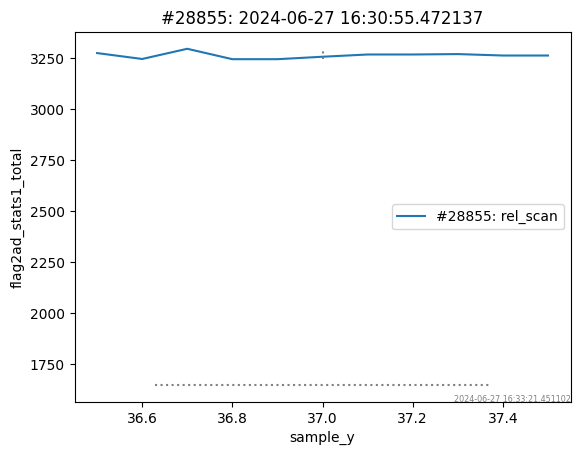

In [23]:
plotxy(-1, "sample_y", "flag2ad_stats1_total")